In [1]:
import numpy as np
import pandas as pd
from tslearn.metrics import cdist_dtw
import hdbscan
from collections import defaultdict
import matplotlib.pyplot as plt

/Users/yingrongmao/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
meme_df = pd.read_csv("meme_table.csv")
meme_df.head()

,meme_id,cluster,created_utc,title,selftext,author,num_comments,score,extracted_text,comments_text,created_date
0,cawlo8,cluster_4,1.562651e+09,"I have an MIDI keyboard, just no plug for it ):",NaN,YTMusicXD,0,3,When you want to easily make midi; limited pow...,NaN,2019-07-09
1,d72m1n,cluster_4,1.569021e+09,R.I.P,NaN,masnargom,0,95,When Imina room full of antivax children and f...,NaN,2019-09-20
2,bo6k2s,cluster_4,1.557769e+09,It's like a life hack,NaN,emanuelegay,2,4,Connect one Power Bank to another one Unlimite...,This is just plug in a power strip to itself\n...,2019-05-13
3,cr40bc,cluster_4,1.565948e+09,I Finally Have Unlimited Power,NaN,Zaxoosh,0,64,When you finally get enough karma to post on r...,NaN,2019-08-16
4,apoel0,cluster_4,1.549939e+09,Crrevt,NaN,memeboiiii7059,0,7,whwn yoy make a meme wirh one hand Unlimited p...,NaN,2019-02-12


In [2]:
date_range = pd.date_range(start='2008-12-01', end='2023-12-31', freq='M')
time_series_data = {}

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/976602117.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2008-12-01', end='2023-12-31', freq='M')


In [4]:
# Generate time-series data for each cluster
for cluster in meme_df["cluster"].unique():
    # Filter data for the current cluster
    new_df = meme_df[meme_df["cluster"] == cluster].copy()
    new_df['created_date'] = pd.to_datetime(new_df['created_date'])
    new_df.set_index('created_date', inplace=True)

    # Resample to monthly frequency and reindex to include the full range
    monthly_frequency = new_df.resample('M').size()
    monthly_frequency = monthly_frequency.reindex(date_range, fill_value=0)

    # Add to the dictionary
    time_series_data[cluster] = np.array(monthly_frequency)

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/3552254108.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/3552254108.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/3552254108.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/3552254108.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/3552254108.

In [5]:
# Convert dictionary to a NumPy array for DTW computation
time_series_array = np.array(list(time_series_data.values()))
template_labels = list(time_series_data.keys())  # Keep track of original template labels

In [6]:
# Compute the DTW distance matrix
distance_matrix = cdist_dtw(time_series_array)

In [7]:
# Apply HDBSCAN clustering with DTW distance matrix
clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=3, min_samples=1)
labels = clusterer.fit_predict(distance_matrix)

In [8]:
# Map HDBSCAN clusters to template labels
hdbscan_clusters = defaultdict(list)
for idx, cluster_label in enumerate(labels):
    hdbscan_clusters[cluster_label].append(template_labels[idx])

In [9]:
# Print each HDBSCAN cluster and its associated templates
print("\nHDBSCAN Clusters and Their Templates:")
for cluster_id, templates in hdbscan_clusters.items():
    print(f"Cluster {cluster_id}: {templates}")


HDBSCAN Clusters and Their Templates:
Cluster 1: ['cluster_4', 'cluster_9', 'cluster_20', 'cluster_21', 'cluster_24', 'cluster_27', 'cluster_28', 'cluster_31', 'cluster_33', 'cluster_35', 'cluster_37', 'cluster_38', 'cluster_49', 'cluster_50', 'cluster_51', 'cluster_76', 'cluster_80', 'cluster_87', 'cluster_88', 'cluster_89', 'cluster_95', 'cluster_96', 'cluster_97', 'cluster_101', 'cluster_114', 'cluster_120', 'cluster_132', 'cluster_133', 'cluster_145', 'cluster_148', 'cluster_149', 'cluster_152', 'cluster_156', 'cluster_157', 'cluster_164', 'cluster_166', 'cluster_169', 'cluster_170', 'cluster_178', 'cluster_186', 'cluster_188', 'cluster_191', 'cluster_193', 'cluster_199', 'cluster_203', 'cluster_206', 'cluster_209', 'cluster_210', 'cluster_218', 'cluster_224', 'cluster_252', 'cluster_263', 'cluster_301', 'cluster_306', 'cluster_307', 'cluster_312', 'cluster_319', 'cluster_325', 'cluster_337', 'cluster_349', 'cluster_358', 'cluster_360', 'cluster_361', 'cluster_381', 'cluster_417',

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/2260158627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_date'] = pd.to_datetime(new_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/2260158627.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()


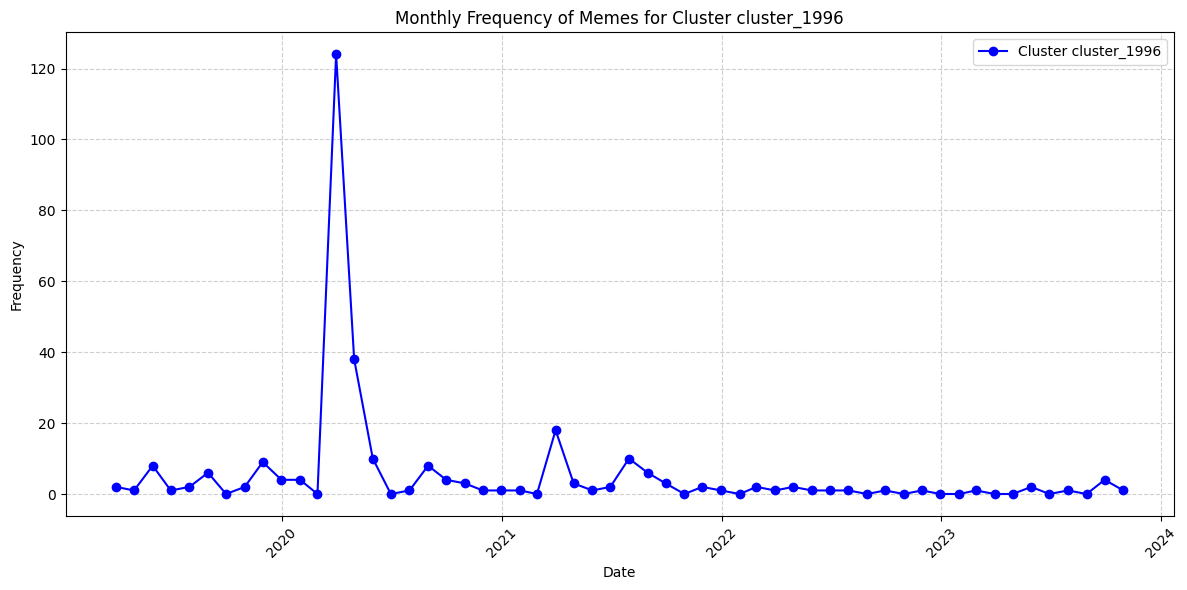

In [10]:
selected_cluster = "cluster_1996"

new_df = meme_df[meme_df["cluster"] == selected_cluster]
new_df['created_date'] = pd.to_datetime(new_df['created_date'])
new_df.set_index('created_date', inplace=True)

# Resample to monthly frequency
monthly_frequency = new_df.resample('M').size()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_frequency.index, monthly_frequency.values, marker='o', linestyle='-', color='blue', label=f"Cluster {selected_cluster}")
plt.title(f"Monthly Frequency of Memes for Cluster {selected_cluster}")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/2790237091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_date'] = pd.to_datetime(new_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/2790237091.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()


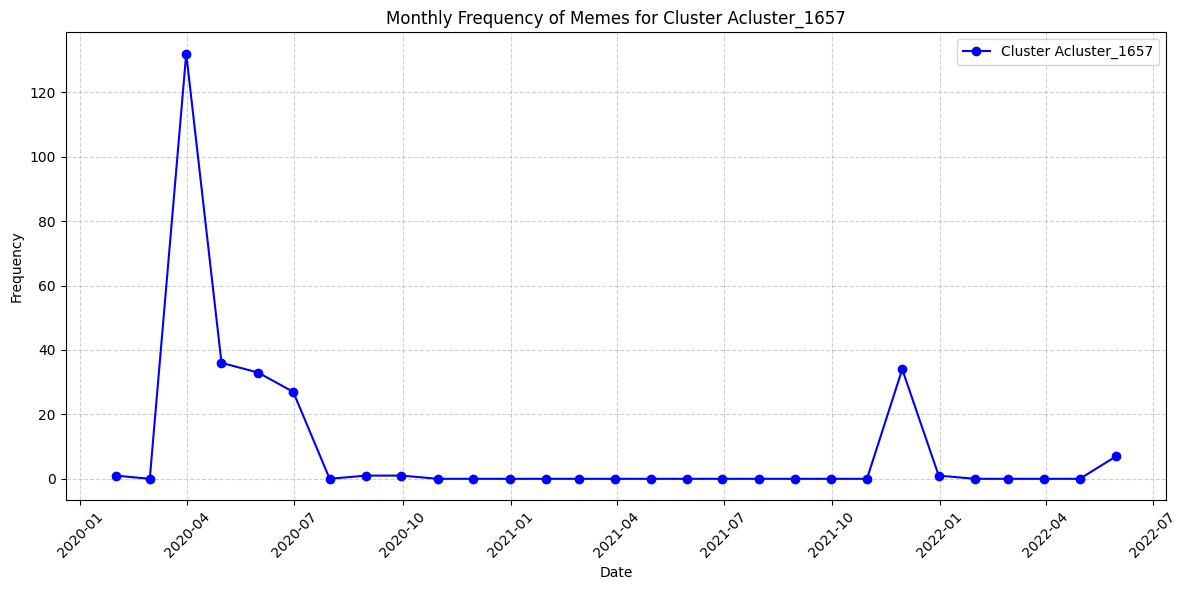

In [11]:
selected_cluster = "Acluster_1657"

new_df = meme_df[meme_df["cluster"] == selected_cluster]
new_df['created_date'] = pd.to_datetime(new_df['created_date'])
new_df.set_index('created_date', inplace=True)

# Resample to monthly frequency
monthly_frequency = new_df.resample('M').size()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_frequency.index, monthly_frequency.values, marker='o', linestyle='-', color='blue', label=f"Cluster {selected_cluster}")
plt.title(f"Monthly Frequency of Memes for Cluster {selected_cluster}")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/1698448959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_date'] = pd.to_datetime(new_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/1698448959.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()


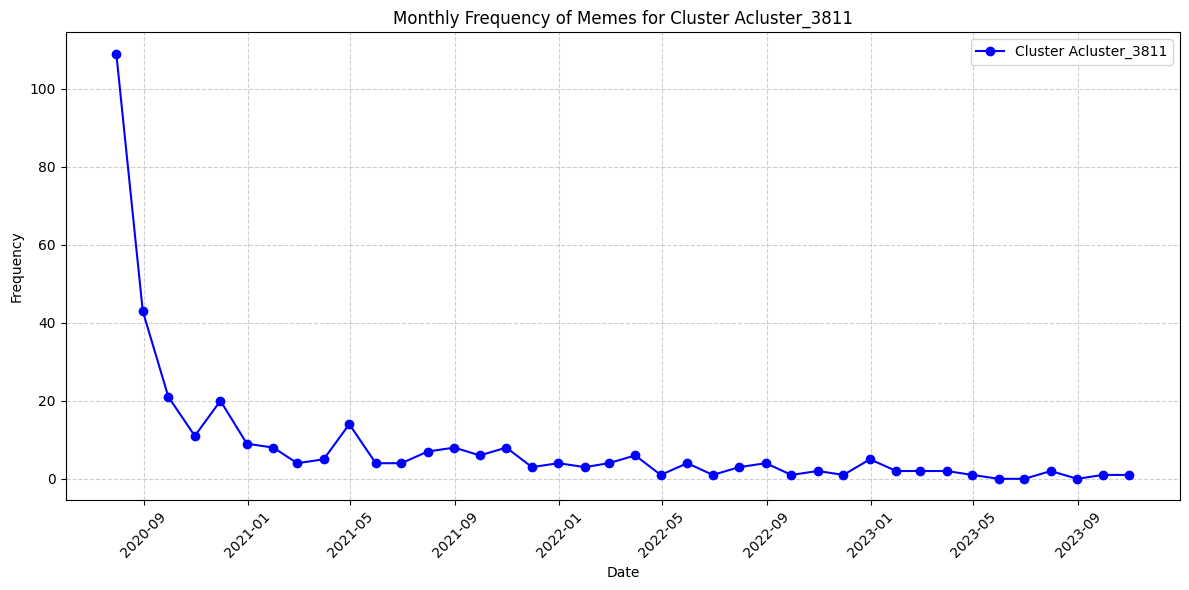

In [12]:
selected_cluster = "Acluster_3811"

new_df = meme_df[meme_df["cluster"] == selected_cluster]
new_df['created_date'] = pd.to_datetime(new_df['created_date'])
new_df.set_index('created_date', inplace=True)

# Resample to monthly frequency
monthly_frequency = new_df.resample('M').size()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_frequency.index, monthly_frequency.values, marker='o', linestyle='-', color='blue', label=f"Cluster {selected_cluster}")
plt.title(f"Monthly Frequency of Memes for Cluster {selected_cluster}")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/2855356408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_date'] = pd.to_datetime(new_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/2855356408.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()


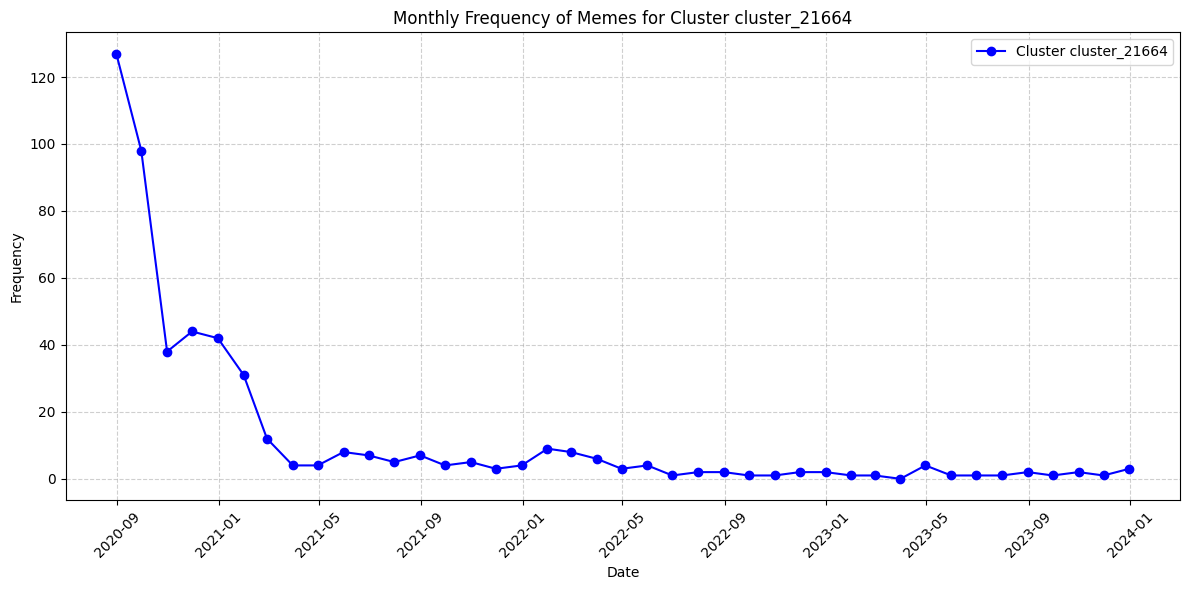

In [13]:
selected_cluster = "cluster_21664"

new_df = meme_df[meme_df["cluster"] == selected_cluster]
new_df['created_date'] = pd.to_datetime(new_df['created_date'])
new_df.set_index('created_date', inplace=True)

# Resample to monthly frequency
monthly_frequency = new_df.resample('M').size()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_frequency.index, monthly_frequency.values, marker='o', linestyle='-', color='blue', label=f"Cluster {selected_cluster}")
plt.title(f"Monthly Frequency of Memes for Cluster {selected_cluster}")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/3686890939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_date'] = pd.to_datetime(new_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/3686890939.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()


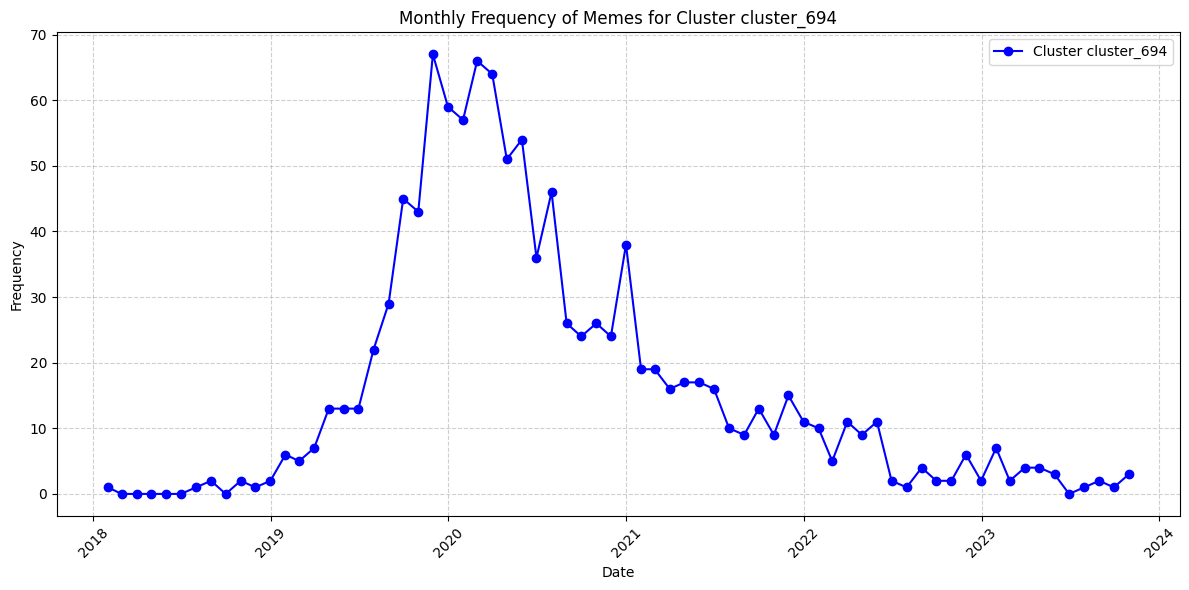

In [14]:
selected_cluster = "cluster_694"

new_df = meme_df[meme_df["cluster"] == selected_cluster]
new_df['created_date'] = pd.to_datetime(new_df['created_date'])
new_df.set_index('created_date', inplace=True)

# Resample to monthly frequency
monthly_frequency = new_df.resample('M').size()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_frequency.index, monthly_frequency.values, marker='o', linestyle='-', color='blue', label=f"Cluster {selected_cluster}")
plt.title(f"Monthly Frequency of Memes for Cluster {selected_cluster}")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/1044742097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_date'] = pd.to_datetime(new_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/1044742097.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()


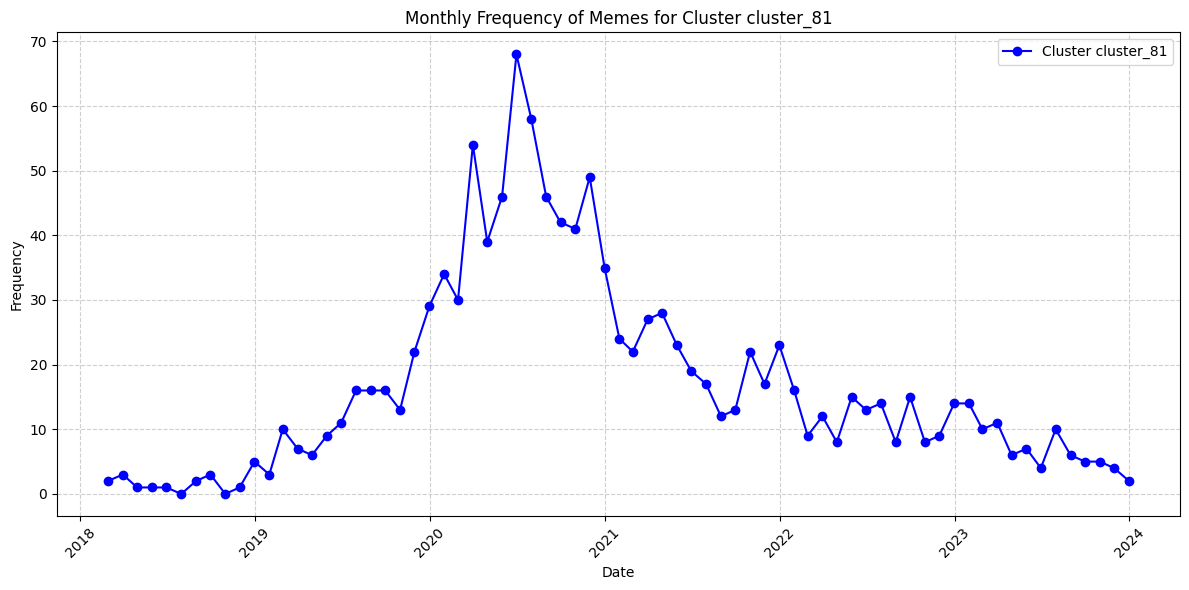

In [15]:
selected_cluster = "cluster_81"

new_df = meme_df[meme_df["cluster"] == selected_cluster]
new_df['created_date'] = pd.to_datetime(new_df['created_date'])
new_df.set_index('created_date', inplace=True)

# Resample to monthly frequency
monthly_frequency = new_df.resample('M').size()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_frequency.index, monthly_frequency.values, marker='o', linestyle='-', color='blue', label=f"Cluster {selected_cluster}")
plt.title(f"Monthly Frequency of Memes for Cluster {selected_cluster}")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/2538882372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_date'] = pd.to_datetime(new_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/2538882372.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()


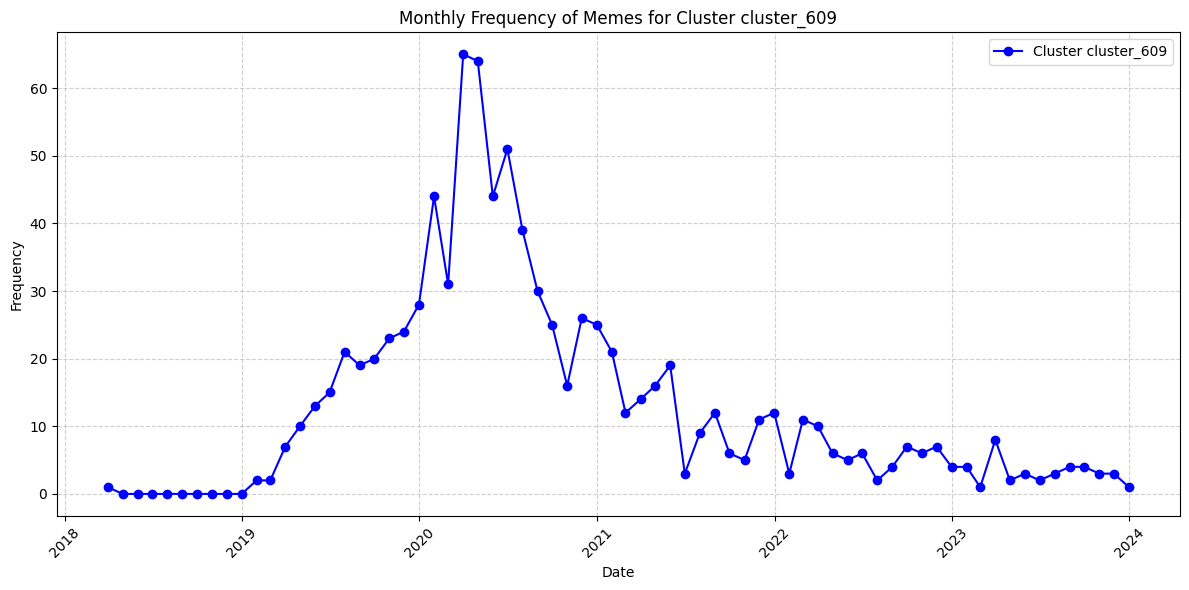

In [16]:
selected_cluster = "cluster_609"

new_df = meme_df[meme_df["cluster"] == selected_cluster]
new_df['created_date'] = pd.to_datetime(new_df['created_date'])
new_df.set_index('created_date', inplace=True)

# Resample to monthly frequency
monthly_frequency = new_df.resample('M').size()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_frequency.index, monthly_frequency.values, marker='o', linestyle='-', color='blue', label=f"Cluster {selected_cluster}")
plt.title(f"Monthly Frequency of Memes for Cluster {selected_cluster}")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/1885770898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_date'] = pd.to_datetime(new_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/1885770898.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()


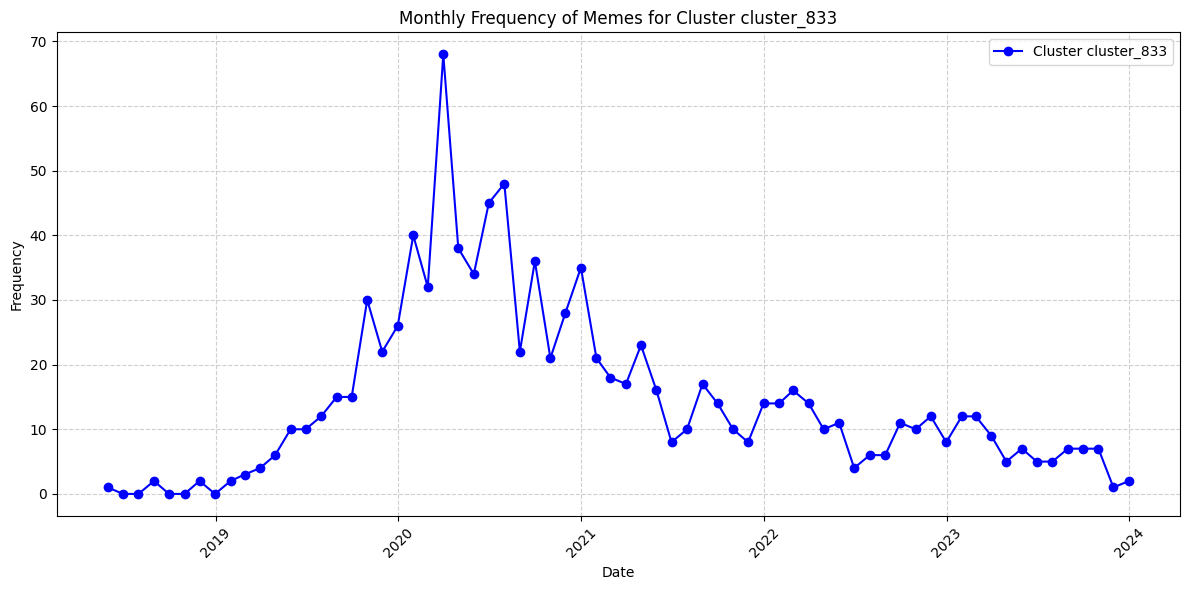

In [17]:
selected_cluster = "cluster_833"

new_df = meme_df[meme_df["cluster"] == selected_cluster]
new_df['created_date'] = pd.to_datetime(new_df['created_date'])
new_df.set_index('created_date', inplace=True)

# Resample to monthly frequency
monthly_frequency = new_df.resample('M').size()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_frequency.index, monthly_frequency.values, marker='o', linestyle='-', color='blue', label=f"Cluster {selected_cluster}")
plt.title(f"Monthly Frequency of Memes for Cluster {selected_cluster}")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/1281161708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_date'] = pd.to_datetime(new_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/1281161708.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()


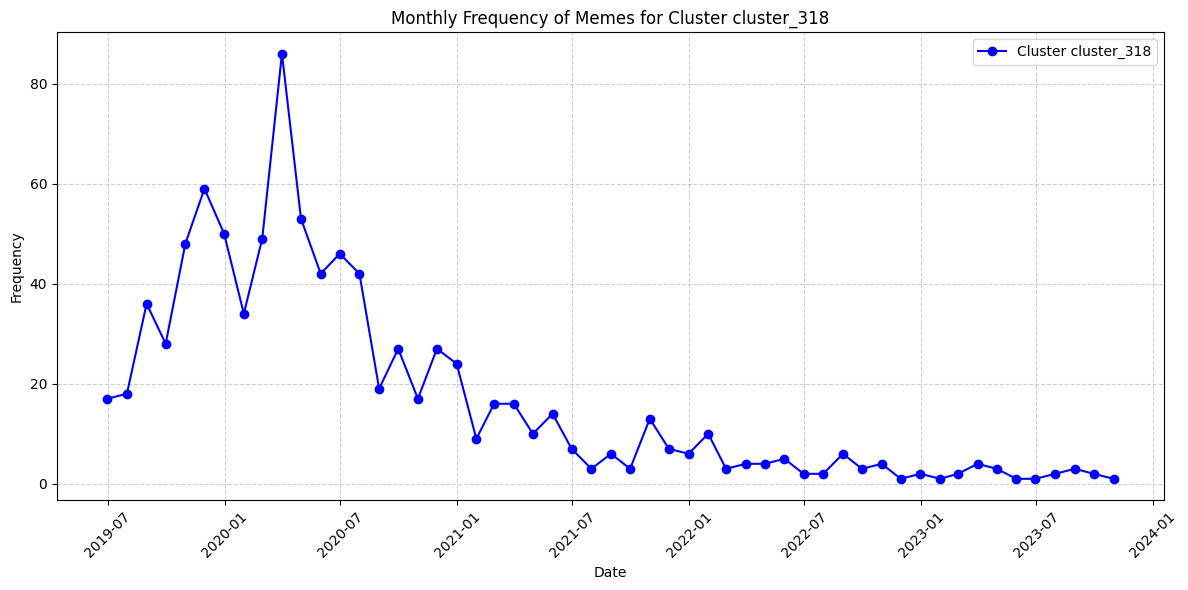

In [18]:
selected_cluster = "cluster_318"

new_df = meme_df[meme_df["cluster"] == selected_cluster]
new_df['created_date'] = pd.to_datetime(new_df['created_date'])
new_df.set_index('created_date', inplace=True)

# Resample to monthly frequency
monthly_frequency = new_df.resample('M').size()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_frequency.index, monthly_frequency.values, marker='o', linestyle='-', color='blue', label=f"Cluster {selected_cluster}")
plt.title(f"Monthly Frequency of Memes for Cluster {selected_cluster}")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/3601369362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_date'] = pd.to_datetime(new_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_24200/3601369362.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = new_df.resample('M').size()


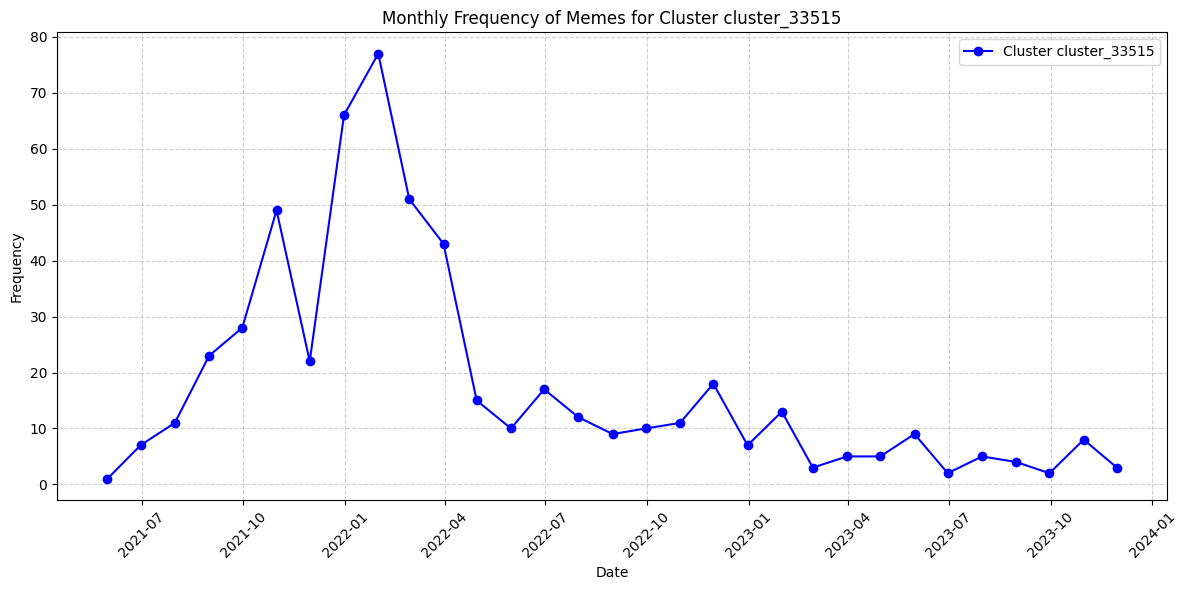

In [19]:
selected_cluster = "cluster_33515"

new_df = meme_df[meme_df["cluster"] == selected_cluster]
new_df['created_date'] = pd.to_datetime(new_df['created_date'])
new_df.set_index('created_date', inplace=True)

# Resample to monthly frequency
monthly_frequency = new_df.resample('M').size()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_frequency.index, monthly_frequency.values, marker='o', linestyle='-', color='blue', label=f"Cluster {selected_cluster}")
plt.title(f"Monthly Frequency of Memes for Cluster {selected_cluster}")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()